In [1]:
import json
import os, sys
import pandas as pd
import numpy as np

# Cell Number per population from DeFelipe lab and Cell2015 S1 model
### 'anatomy/S1-cells-distributions-Mouse.txt' printed using 'allcellsinfo.ipynb'

In [2]:
Epops= ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

with open('anatomy/S1-cells-distributions-Mouse.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popParamLabels = []
Ipops = []

for line in mtype_content.split('\n')[:-1]:
    metype, mtype, etype, n, m = line.split()
    if mtype not in popParamLabels:
        popParamLabels.append(mtype)
        if mtype not in Epops:
            Ipops.append(mtype)
n2 = 0
metag = {}
popNumber2 = {}
cellNumber = {} 
popLabel = {} 
popLabelEl = {} 
meParamLabels = {} 
for line in mtype_content.split('\n')[:-1]:
    metype, mtype, etype, n, m = line.split()
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popLabelEl[metype] = etype
    popNumber2[mtype] = int(m)
    metag[metype] = n2    
    n2 = n2 + 1

with open('anatomy/mtype_map.tsv') as mtype_map_file:
    mtype_map_content = mtype_map_file.read()    
mtype_map = {}
mtype_map2 = {}
for line in mtype_map_content.split('\n')[:-1]:
    n, mtype = line.split()
    mtype_map[mtype] = int(n)
    mtype_map2[int(n)] = mtype    

# Anatomy pathways from Netconnections_mean.json (Cell2015)

In [3]:
# initialize prob and weight matrices
# format: pmat[presynaptic_pop][postsynaptic_pop] 
data = {}
data['BBP_S1'] = {}
with open('anatomy/Netconnections_mean.json', 'r') as f:
    data['BBP_S1']['connProb'] = json.load(f) 
connDataSource = {}
connDataSource['E->E/I'] = 'BBP_S1' 
connDataSource['I->E/I'] = 'BBP_S1' 
pmat = {}  # probability of connection matrix full mc2
connNumber = {}        # ~ "total_conn_count"
lmat = {}  # length constant (lambda) for exp decaying prob conn (um) matrix
a0mat = {} # probability of connection matrix dist 2D  = 0 um
d0 = {} #  matrix min to fit exp dist 2D [12.5,25,...,150]
dfinal = {} #  matrix max to fit exp dist 2D [125,...,375]
pmat12um = {} # probability of connection matrix dist 2D -> 12.5um +- 12.5um
pmat25um = {} # probability of connection matrix dist 2D -> 25um +- 25um
pmat50um = {}
pmat75um = {}
pmat100um = {}
pmat125um = {}
pmat150um = {}
pmat175um = {}
pmat200um = {}
pmat225um = {}
pmat250um = {}
pmat275um = {}
pmat300um = {}
pmat325um = {}
pmat350um = {}
pmat375um = {} 
for p in Epops + Ipops:
    pmat[p] = {}
    connNumber[p] = {}  
    lmat[p] = {}
    a0mat[p] = {}  
    d0[p] = {}
    dfinal[p] = {}
    pmat12um[p] = {}
    pmat25um[p] = {}
    pmat50um[p] = {}
    pmat75um[p] = {}
    pmat100um[p] = {}
    pmat125um[p] = {}
    pmat150um[p] = {}
    pmat175um[p] = {}
    pmat200um[p] = {}
    pmat225um[p] = {}
    pmat250um[p] = {}
    pmat275um[p] = {}
    pmat300um[p] = {}
    pmat325um[p] = {}
    pmat350um[p] = {}
    pmat375um[p] = {}     

In [4]:
synperconnNumber = {}        # ~ "mean_number_of_synapse_per_connection"
synperconnNumberStd = {}   
for p in Epops + Ipops:   
    synperconnNumber[p] = {}
    synperconnNumberStd[p] = {}

for pre in Epops+Ipops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:
            synperconnNumber[pre][post] = 0
            synperconnNumberStd[pre][post] = 0

In [5]:
# LOAD DATA FROM .TSV files resume
with open('anatomy/synNumberperconex.dat') as synNumber_file:
    synNumber_content = synNumber_file.read()
    
for line in synNumber_content.split('\n')[:-1]:
    n, m, mean, stdev, synNumber, proj = line.split()
    pre = mtype_map2[int(n)]
    post = mtype_map2[int(m)]   
    proj = '%s:%s' % (pre, post)
    if proj in data['BBP_S1']['connProb']:    
        synperconnNumber[pre][post] = np.ceil(float(mean))
        synperconnNumberStd[pre][post] = float(stdev)

In [6]:
# LOAD WITH PANDAS DATA FROM json files 
anatomy_data = json.loads(open("anatomy/pathways_anatomy_factsheets_simplified.json").read())
columnNames2 = ["total_synapse_count", "mean_number_of_synapse_per_connection", "number_of_convergent_neuron_mean"]
columnNames = ["From Cell", "To Cell"] + list(anatomy_data[list(anatomy_data.keys() )[0]].keys())
df = pd.DataFrame(columns=columnNames, data = [[k.split(":")[0], k.split(":")[1]] + list(v.values()) for k, v in anatomy_data.items()    ])
df = df.sort_values(by=['From Cell'])
df = df.drop(columns=['number_of_convergent_neuron_std', 'connection_probability', 'number_of_divergent_neuron_std', 'total_synapse_count',
 'common_neighbor_bias', 'number_of_convergent_neuron_mean', 'number_of_divergent_neuron_mean'])
for conn in range(1932):
    pre = df["From Cell"][conn]
    post = df["To Cell"][conn]
    proj = '%s:%s' % (pre, post)
    if proj in data['BBP_S1']['connProb']:
        synperconnNumber[pre][post] = np.ceil(df["mean_number_of_synapse_per_connection"][conn])
        synperconnNumberStd[pre][post] = df["number_of_synapse_per_connection_std"][conn]
df.head()

,From Cell,To Cell,mean_number_of_synapse_per_connection,number_of_synapse_per_connection_std
1616,L1_DAC,L1_SLAC,12.0,3.9
839,L1_DAC,L1_HAC,15.0,6.3
558,L1_DAC,L23_NGC,7.0,1.9
1768,L1_DAC,L4_SP,5.7,1.7
1769,L1_DAC,L4_SS,6.1,2.7


In [7]:
# For missing data use mean of Layer-Type:Layer-Type projections
layersT = ['L1e', 'L2e', 'L4e', 'L5e', 'L6e', 'L1i', 'L2i', 'L4i', 'L5i', 'L6i']
synperconnNumberT = {}
synperconnNumberN = {}
for pre in layersT:
    synperconnNumberT[pre] = {}
    synperconnNumberN[pre] = {}
    for post in layersT:
        synperconnNumberT[pre][post] = 0
        synperconnNumberN[pre][post] = 0           
    
for pre in Epops+Ipops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:

            if pre in Epops:
                pre2 = str(pre[0:2]) + 'e'
            else:
                pre2 =  str(pre[0:2]) + 'i'
            if post in Epops:
                post2 =  str(post[0:2]) + 'e'
            else:
                post2 =  str(post[0:2]) + 'i'

            if synperconnNumber[pre][post] > 0:
                synperconnNumberT[pre2][post2] = synperconnNumberT[pre2][post2] + synperconnNumber[pre][post]
                synperconnNumberN[pre2][post2] = synperconnNumberN[pre2][post2] + 1

for pre in Epops+Ipops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:
            if synperconnNumber[pre][post] == 0:
                if pre in Epops:
                    pre2 = str(pre[0:2]) + 'e'
                else:
                    pre2 =  str(pre[0:2]) + 'i'

                if post in Epops:
                    post2 =  str(post[0:2]) + 'e'
                else:
                    post2 =  str(post[0:2]) + 'i'

                synperconnNumber[pre][post] = np.ceil(synperconnNumberT[pre2][post2]/synperconnNumberN[pre2][post2])  #mean of Layer-Type:Layer-Type projections

In [8]:
number = 0 
for pre in Epops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:            
            number = number + synperconnNumber[pre][post] * float(data['BBP_S1']['connProb'][proj]['conn_total'])
print('syn total Exc = %.0f' % number)

syn total Exc = 27614163


In [9]:
numberI = 0 
for pre in Ipops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:            
            numberI = numberI + synperconnNumber[pre][post] * float(data['BBP_S1']['connProb'][proj]['conn_total'])
print('syn total Inh = %.0f' % numberI)

syn total Inh = 10423033


In [10]:

for conn in range(1932):
    pre = df["From Cell"][conn]
    post = df["To Cell"][conn]
    proj = '%s:%s' % (pre, post)
    if proj in data['BBP_S1']['connProb']:
        if pre in Ipops:
            synperconnNumber[pre][post] = synperconnNumber[pre][post]-1

# number = 0 
# for conn in range(1932):
#     pre = df["From Cell"][conn]
#     post = df["To Cell"][conn]
#     proj = '%s:%s' % (pre, post)
#     if proj in data['BBP_S1']['connProb']:
#         error = 100*(synperconnNumber[pre][post]-df["mean_number_of_synapse_per_connection"][conn])/df["mean_number_of_synapse_per_connection"][conn]
#         if pre in Ipops:
#             print ('%s:%s - Json = %.2f - tsv = %.2f - error = %.1f percent (%s)' % (pre, post,df["mean_number_of_synapse_per_connection"][conn],synperconnNumber[pre][post],error,data['BBP_S1']['connProb'][proj]['conn_total']))
#             number = number + 1
numberI = 0 
for pre in Ipops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:            
            numberI = numberI + synperconnNumber[pre][post] * float(data['BBP_S1']['connProb'][proj]['conn_total'])
print('syn total Inh = %.0f' % numberI)

syn total Inh = 9684705


In [11]:
number = 0 
for pre in Epops+Ipops:
    for post in Epops+Ipops: 
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:           
            if synperconnNumber[pre][post] > 0:
                number = number + 1
number

1940

# Physiology pathways from Cell2015 (table S6 and portal data)

In [12]:
# LOAD WITH PANDAS DATA FROM json files 
physiology_data = json.loads(open("physiology/pathways_physiology_factsheets_simplified.json").read())
physColumnNames = ["Connection", "From Cell", "From Layer", "From Type", "To Cell", "To Layer", "To Type"] + list(physiology_data[list(physiology_data.keys() )[0]].keys())
df2 = pd.DataFrame(columns=physColumnNames, data = [[k,  k.split(":")[0],  k.split(":")[0].split("_")[0], k.split(":")[0].split("_")[1], k.split(":")[1], k.split(":")[1].split("_")[0], k.split(":")[1].split("_")[1]] + list(v.values()) for k, v in physiology_data.items()    ])
df2 = df2.sort_values(by=['Connection'])
df2.head()

,Connection,From Cell,From Layer,From Type,To Cell,To Layer,To Type,gsyn_mean,epsp_mean,risetime_std,...,space_clamp_correction_factor,latency_std,decay_std,cv_psp_amplitude_std,risetime_mean,cv_psp_amplitude_mean,epsp_std,d_mean,f_mean,failures_std
1558,L1_DAC:L1_DAC,L1_DAC,L1,DAC,L1_DAC,L1,DAC,0.36,2.1,0.85,...,Synaptic conductance not measured experimentally,0.6500,11.0,0.120,5.5,0.49,0.45,750,22.0,7.8
1841,L1_DAC:L1_DLAC,L1_DAC,L1,DAC,L1_DLAC,L1,DLAC,0.41,2.2,0.00,...,Synaptic conductance not measured experimentally,0.0000,0.0,0.000,6.1,0.39,0.00,820,24.0,0.0
1405,L1_DAC:L1_HAC,L1_DAC,L1,DAC,L1_HAC,L1,HAC,0.37,2.4,0.90,...,Synaptic conductance not measured experimentally,0.4700,2.5,0.100,5.8,0.46,0.94,770,22.0,4.6
662,L1_DAC:L1_NGC-DA,L1_DAC,L1,DAC,L1_NGC-DA,L1,NGC-DA,0.26,2.6,0.29,...,Synaptic conductance not measured experimentally,0.0033,1.7,0.026,3.8,0.62,0.52,610,19.0,3.3
513,L1_DAC:L1_NGC-SA,L1_DAC,L1,DAC,L1_NGC-SA,L1,NGC-SA,0.33,2.6,0.58,...,Synaptic conductance not measured experimentally,0.5900,3.3,0.036,4.4,0.58,0.75,710,21.0,1.6


In [13]:
with open('physiology/physiology_synTypes.dat') as physiology_file:
    physiology_content = physiology_file.read()

parameters_name = {}   
ConnTypeNumber = -1  
parameters_syn = {}
syntypes = {}
for line in physiology_content.split('\n')[:-1]:    
    if ConnTypeNumber < 0:
        n2 = 0
        parameters_list = line.split()   
        for parameter in parameters_list:
            parameters_name[n2] = str(parameter)
            n2 = n2 + 1   
    else:
        n2 = 0
        parameters_list = line.split()   
        for parameter in parameters_list:
            if n2 == 0:
                parameters_syn[parameters_name[n2],ConnTypeNumber] = int(parameter)
                syntypes[ConnTypeNumber] = int(parameter)
            elif n2 > 10:
                parameters_syn[parameters_name[n2],ConnTypeNumber] = str(parameter)                
            else:
                parameters_syn[parameters_name[n2],ConnTypeNumber] = float(parameter)
            n2 = n2 + 1
                
    ConnTypeNumber = ConnTypeNumber + 1
    
parameters_name[0]

'ConnType'

In [14]:
physColumnNames = [parameters_name[x] for x in parameters_name]
dfS6 = pd.DataFrame(index=syntypes, columns=physColumnNames)
for syntype in syntypes:
    for name in physColumnNames:    
        dfS6.loc[syntype][name] = parameters_syn[name,syntype]
dfS6

,ConnType,gsyn,gsynStd,decay,decayStd,use,useStd,dep,depStd,fac,facStd,s-types,type
0,0,0.83,0.2,10.4,6.1,0.16,0.1,45,21,376,253,I1,IE
1,1,0.83,0.55,8.3,2.2,0.25,0.13,706,405,21,9,I2,II
2,3,0.91,0.61,10.4,6.1,0.16,0.1,45,21,376,253,I1,IE
3,4,0.91,0.61,8.3,2.2,0.25,0.13,706,405,21,9,I2,IE
4,5,0.91,0.61,6.44,1.7,0.32,0.14,144,80,62,31,I3,IE
5,8,0.75,0.32,8.3,2.2,0.25,0.13,706,405,21,9,I2,IE
6,9,0.75,0.32,8.3,2.2,0.3,0.08,1250,520,2,4,I2,IE
7,10,0.91,0.61,8.3,2.2,0.14,0.05,875,285,22,5,I2,IE
8,11,0.83,0.2,10.4,6.1,0.25,0.13,706,405,21,9,I3,IE
9,12,0.91,0.61,8.3,2.2,0.25,0.13,706,405,21,9,I2,IE


In [15]:
with open('physiology/matrixsyntypes.dat') as synNumber_file:
    synNumber_content = synNumber_file.read()

ConnTypes = {}
ConnTypesNumber = {}      
for p in Epops + Ipops:   
    ConnTypesNumber[p] = {}
    ConnTypes[p] = {}

for pre in Epops+Ipops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:
            ConnTypesNumber[pre][post] = 0
            ConnTypes[pre][post] = 0
    
for line in synNumber_content.split('\n')[:-1]:
    n, m, number, number2, number3, number4 = line.split()
    pre = mtype_map2[int(n)]
    post = mtype_map2[int(m)]
    proj = '%s:%s' % (pre, post)
    if proj in data['BBP_S1']['connProb']:
        if int(number3)!=50:
            ConnTypesNumber[pre][post] = 3
            ConnTypes[pre][post] = [int(number), int(number2), int(number3)]
        elif int(number2)!=50:
            ConnTypesNumber[pre][post] = 2
            ConnTypes[pre][post] = [int(number), int(number2)]
        elif int(number)!=50:
            ConnTypesNumber[pre][post] = 1
            ConnTypes[pre][post] = [int(number)]

In [16]:
# ConnTypes II
for pre in Ipops:
    for post in Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:                
            if ConnTypesNumber[pre][post] == 0:
#                 print ('ConnNumberTypes[%s][%s] = %d' % (pre, post, ConnTypesNumber[pre][post])) 
                ConnTypesNumber[pre][post] = 1
                ConnTypes[pre][post] = [1]     

In [17]:
# ConnTypes IE
for pre in Ipops: # L1 
    for post in Epops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:           
            if str(pre[0:2]) == 'L1':
                ConnTypesNumber[pre][post] = 1
                ConnTypes[pre][post] = [1]    
                
for pre in Ipops:
    for post in Epops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:   
            if str(pre[-3:]) == 'NGC':
                ConnTypesNumber[pre][post] = 1
                ConnTypes[pre][post] = [11]    
                
ConnTypesNumber['L23_MC']['L6_IPC'] = 1
ConnTypes['L23_MC']['L6_IPC'] = [9]

ConnTypesNumber['L6_DBC']['L6_SBC'] = 1
ConnTypes['L6_DBC']['L6_SBC'] = [0]

for pre in Ipops:
    for post in Epops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:   
            if str(pre[-3:]) == 'ChC':
                ConnTypesNumber[pre][post] = 1
                ConnTypes[pre][post] = [12]  

for pre in Ipops:
    for post in Epops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:   
            if str(pre[-3:]) == 'DBC' or str(pre[-3:]) == '_BP' or str(pre[-3:]) == 'BTC':
                ConnTypesNumber[pre][post] = 1
                ConnTypes[pre][post] = [8]  
for pre in Ipops:
    for post in Epops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:   
            if str(pre[-3:]) == 'SBC':
                ConnTypesNumber[pre][post] = 3
                ConnTypes[pre][post] = [4, 5, 3]   
                
for pre in Ipops:
    for post in Epops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:   
            if str(pre[-3:]) == 'LBC' or str(pre[-3:]) == 'NBC':
                ConnTypesNumber[pre][post] = 2
                ConnTypes[pre][post] = [5, 10]

In [18]:
# ConnTypes EI
ConnTypesNumber['L4_SS']['L1_HAC'] = 1
ConnTypes['L4_SS']['L1_HAC'] = [117]
ConnTypesNumber['L5_TTPC1']['L1_HAC'] = 1
ConnTypes['L5_TTPC1']['L1_HAC'] = [117]
ConnTypesNumber['L5_TTPC2']['L1_HAC'] = 1
ConnTypes['L5_TTPC2']['L1_HAC'] = [117]
ConnTypesNumber['L5_UTPC']['L1_DAC'] = 1
ConnTypes['L5_UTPC']['L1_DAC'] = [117]
ConnTypesNumber['L6_TPC_L1']['L23_NGC'] = 1
ConnTypes['L6_TPC_L1']['L23_NGC'] = [117]

In [19]:
for pre in Epops:
    for post in Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:   
            if ConnTypesNumber[pre][post] == 2:
                if 117 in ConnTypes[pre][post]:
                    ConnTypes[pre][post] = [117, 114]
                elif 134 in ConnTypes[pre][post]:
                    ConnTypes[pre][post] = [134, 115]          

In [20]:
number = 0
for pre in Epops+Ipops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:   
            if ConnTypesNumber[pre][post] > 0:
#                 print ('ConnNumberTypes[%s][%s] = %d' % (pre, post, ConnTypesNumber[pre][post])) 
#                 print (ConnTypes[pre][post])
                number = number + 1
number      

1941

In [21]:
# initialize Phys parameters matrix
gsyn = {}         
decay = {}      
use = {}
dep = {}
fac = {}
gsynStd = {}    
decayStd = {}  
useStd = {}
depStd = {}
facStd = {}
stypes = {}
EItype = {} 

for p in Epops + Ipops:
    gsyn[p] = {}          
    decay[p] = {}       
    use[p] = {} 
    dep[p] = {} 
    fac[p] = {}  
    gsynStd[p] = {}     
    decayStd[p] = {}   
    useStd[p] = {} 
    depStd[p] = {} 
    facStd[p] = {} 
    stypes[p] = {} 
    EItype[p] = {} 
    
connType = {}
for conn in range(29):
    connType[parameters_syn['ConnType',conn]] = conn
    
number = 0
for pre in Epops+Ipops:
    for post in Epops+Ipops:
        proj = '%s:%s' % (pre, post)
        if proj in data['BBP_S1']['connProb']:  
            
            conn = connType[ConnTypes[pre][post][0]]
            
            gsyn[pre][post] = parameters_syn['gsyn',conn]
            gsynStd[pre][post] =  parameters_syn['gsynStd',conn]
            decay[pre][post] =  parameters_syn['decay',conn]
            decayStd[pre][post] =parameters_syn['decayStd',conn]
            use[pre][post] = parameters_syn['use',conn]
            useStd[pre][post] = parameters_syn['useStd',conn]
            dep[pre][post] = parameters_syn['dep',conn]
            depStd[pre][post] =parameters_syn['depStd',conn]
            fac[pre][post] = parameters_syn['fac',conn]
            facStd[pre][post] = parameters_syn['facStd',conn]
            stypes[pre][post] = parameters_syn['s-types',conn]
            EItype[pre][post] = parameters_syn['type',conn]
            
            number = number + 1
number           

1941

In [22]:
# if connDataSource['E->E/I'] == 'BBP_S1': 
if connDataSource['I->E/I'] ==  'BBP_S1': 
    for pre in popParamLabels:
        for post in popParamLabels:
            proj = '%s:%s' % (pre, post)
            if proj in data['BBP_S1']['connProb']:
                pmat[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_full']
                connNumber[pre][post] = data['BBP_S1']['connProb'][proj]['conn_total']

                lmat[pre][post] = data['BBP_S1']['connProb'][proj]['shape']
                a0mat[pre][post] = data['BBP_S1']['connProb'][proj]['A0']
                d0[pre][post] = data['BBP_S1']['connProb'][proj]['d_init']

                dfinal[pre][post] = data['BBP_S1']['connProb'][proj]['d_final']

                pmat12um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_12.5um'] 
                pmat25um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_25um'] 
                pmat50um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_50um'] 
                pmat75um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_75um'] 
                pmat100um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_100um']
                pmat125um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_125um']
                pmat150um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_150um']
                pmat175um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_175um']
                pmat200um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_200um']
                pmat225um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_225um']
                pmat250um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_250um']
                pmat275um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_275um']
                pmat300um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_300um']
                pmat325um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_325um']
                pmat350um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_350um']
                pmat375um[pre][post] = data['BBP_S1']['connProb'][proj]['conn_prob_375um']
            else:
                pmat[pre][post] = 0
                lmat[pre][post] = 0
                connNumber[pre][post] = 0

                d0[pre][post] = 0
                a0mat[pre][post] = 0                
                lmat[pre][post] = 0

                dfinal[pre][post] = 0

                pmat12um[pre][post] = 0
                pmat25um[pre][post] = 0
                pmat50um[pre][post] = 0
                pmat75um[pre][post] = 0
                pmat100um[pre][post] = 0
                pmat125um[pre][post] = 0
                pmat150um[pre][post] = 0
                pmat175um[pre][post] = 0
                pmat200um[pre][post] = 0
                pmat225um[pre][post] = 0
                pmat250um[pre][post] = 0
                pmat275um[pre][post] = 0
                pmat300um[pre][post] = 0
                pmat325um[pre][post] = 0
                pmat350um[pre][post] = 0
                pmat375um[pre][post] = 0

                gsyn[pre][post] = 0
                gsynStd[pre][post] = 0
                if pre in Epops:
                    decay[pre][post] = 1.7
                else:
                    decay[pre][post] = 8.3
                decayStd[pre][post] = 0
                synperconnNumber[pre][post] = 0
                synperconnNumberStd[pre][post] = 0      
                
                use[pre][post] = 0 
                useStd[pre][post] = 0 
                dep[pre][post] = 0 
                depStd[pre][post] = 0
                fac[pre][post] = 0 
                facStd[pre][post] = 0 
                stypes[pre][post] = 'none'
                EItype[pre][post] = 'none'

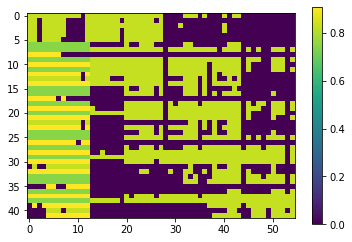

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
number = 0
matrix = np.zeros((42, 55)) #13 + 42
for pre in Ipops:
    number2 = 0
    for post in Epops+Ipops:
        matrix[number][number2] = gsyn[pre][post]      
        number2 = number2 + 1   
    number = number + 1

# np.savetxt('matrix_gsyn.txt',matrix, fmt='%.2f', delimiter=" ")
plt.imshow(matrix)
plt.colorbar()

In [24]:
#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------
# Load 55 Morphological Names-> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names-> L1:14 L23:43 L4:46 L5:52 L6:52

rootFolder = '/home/fernando/S1_mouse'
with open(rootFolder + '/info/anatomy/S1-cells-distributions-Rat.txt') as metype_file:
    metype_content = metype_file.read()       

MtypeNumberRat = {}
NRat = 0
for line in metype_content.split('\n')[:-1]:
    metype, mtype, etype, n, m = line.split()
    MtypeNumberRat[mtype] = int(m)

    NRat = NRat + int(n)
    
print ('Number of cells = %d' % NRat)

Number of cells = 31346


In [25]:
addQuantalSyn = 1 
#------------------------------------------------------------------------------
# NetStim inputs to simulate Spontaneous synapses + background
#------------------------------------------------------------------------------
if addQuantalSyn:   
    synperNeuronE = {}
    synperNeuronI = {}
    GsynE = {}
    GsynI = {}
    for post in Ipops + Epops:
        synperNeuronE[post] = 0
        synperNeuronI[post] = 0    
        GsynE[post] = 0
        GsynI[post] = 0
    
    for post in Ipops + Epops:
        for pre in Ipops:
            if float(connNumber[pre][post]) > 0:
                synTotal = float(connNumber[pre][post])*synperconnNumber[pre][post]       
                synperNeuron = synTotal/MtypeNumberRat[post]
                synperNeuronI[post] = synperNeuronI[post] + synperNeuron
                GsynI[post] = GsynI[post] + gsyn[pre][post] * synperNeuron

        for pre in Epops:
            if float(connNumber[pre][post]) > 0:
                synTotal = float(connNumber[pre][post])*synperconnNumber[pre][post]       
                synperNeuron = synTotal/MtypeNumberRat[post]
                synperNeuronE[post] = synperNeuronE[post] + synperNeuron
                GsynE[post] = GsynE[post] + gsyn[pre][post] * synperNeuron

    GsynTotalE = 0
    GsynTotalI = 0
    synTotalE = 0
    synTotalI = 0
    for post in Ipops + Epops:
        for pre in Ipops:
            if float(connNumber[pre][post]) > 0:
                synTotal = float(connNumber[pre][post])*synperconnNumber[pre][post] 
                GsynTotalI = GsynTotalI + gsyn[pre][post] * synTotal                
                synTotalI = synTotalI + synTotal                
        for pre in Epops:
            if float(connNumber[pre][post]) > 0:
                synTotal = float(connNumber[pre][post])*synperconnNumber[pre][post]      
                GsynTotalE = GsynTotalE + gsyn[pre][post] * synTotal              
                synTotalE = synTotalE + synTotal
         
print ('G_Exc = %.2f nS (%.d), G_Inh = %.2f nS (%.d)' % (GsynTotalE/NRat, synTotalE/NRat, GsynTotalI/NRat, synTotalI/NRat))                
print ('mean G_Exc = %.2f nS, mean G_Inh = %.2f nS ' % (GsynTotalE/synTotalE, GsynTotalI/synTotalI))

G_Exc = 693.32 nS (880), G_Inh = 257.91 nS (308)
mean G_Exc = 0.79 nS, mean G_Inh = 0.83 nS 


In [26]:
# If do not use np.ceil() and decrease by 1 the synperconnNumber Inh
# G_Exc = 622.97 nS (789), G_Inh = 275.95 nS (330)
# mean G_Exc = 0.79 nS, mean G_Inh = 0.83 nS 

# Cell 2015
# The predicted average total synaptic conductance for single neurons was 1000 nS (750 nS excitatory and
# 250 nS inhibitory conductance; based on all synapses in BioM). Predicted average quantal conductance was 
# 0.85 ± 0.44 nS for excitatory synapses and 0.84 ± 0.29 nS for inhibitory synapses. 
print ('G_Exc = %.2f nS (%.d), G_Inh = %.2f nS (%.d)' % (750, 750/0.85, 250, 250/0.84))
print ('mean G_Exc = %.2f nS, mean G_Inh = %.2f nS ' % (0.85, 0.84))

G_Exc = 750.00 nS (882), G_Inh = 250.00 nS (297)
mean G_Exc = 0.85 nS, mean G_Inh = 0.84 nS 


In [27]:
GsynStimI = {}
GsynStimE = {}
for post in Ipops + Epops:
    GsynStimI[post] = GsynI[post]/synperNeuronI[post]
    GsynStimE[post] = GsynE[post]/synperNeuronE[post]    
    print ('input_%s : Inh = %.0f syn, G = %.1f nS (%.2f nS), Exc = %.0f syn, G = %.1f nS (%.2f nS)' % (post,synperNeuronI[post],GsynI[post],GsynI[post]/synperNeuronI[post],synperNeuronE[post],GsynE[post],GsynE[post]/synperNeuronE[post]))
    
synperNeuronStimI = synperNeuronI
synperNeuronStimE = synperNeuronE

input_L1_DAC : Inh = 175 syn, G = 144.9 nS (0.83 nS), Exc = 41 syn, G = 17.6 nS (0.43 nS)
input_L1_DLAC : Inh = 175 syn, G = 145.4 nS (0.83 nS), Exc = 31 syn, G = 13.5 nS (0.43 nS)
input_L1_HAC : Inh = 124 syn, G = 102.8 nS (0.83 nS), Exc = 18 syn, G = 7.7 nS (0.43 nS)
input_L1_NGC-DA : Inh = 97 syn, G = 80.2 nS (0.83 nS), Exc = 16 syn, G = 6.8 nS (0.43 nS)
input_L1_NGC-SA : Inh = 93 syn, G = 77.5 nS (0.83 nS), Exc = 16 syn, G = 6.9 nS (0.43 nS)
input_L1_SLAC : Inh = 101 syn, G = 84.1 nS (0.83 nS), Exc = 22 syn, G = 9.4 nS (0.43 nS)
input_L23_BP : Inh = 16 syn, G = 13.5 nS (0.83 nS), Exc = 18 syn, G = 7.8 nS (0.43 nS)
input_L23_BTC : Inh = 245 syn, G = 203.0 nS (0.83 nS), Exc = 262 syn, G = 112.6 nS (0.43 nS)
input_L23_ChC : Inh = 220 syn, G = 182.6 nS (0.83 nS), Exc = 207 syn, G = 149.3 nS (0.72 nS)
input_L23_DBC : Inh = 55 syn, G = 45.5 nS (0.83 nS), Exc = 59 syn, G = 25.3 nS (0.43 nS)
input_L23_LBC : Inh = 244 syn, G = 202.2 nS (0.83 nS), Exc = 283 syn, G = 203.8 nS (0.72 nS)
input_

In [29]:
# Save data to pkl file
savePickle = 0

if savePickle:
    import pickle
    with open('conn.pkl', 'wb') as f:
        pickle.dump({'pmat': pmat, 'lmat': lmat, 'a0mat': a0mat, 'd0': d0, 
        'dfinal': dfinal, 'pmat12um': pmat12um, 'pmat25um': pmat25um, 'pmat50um': pmat50um, 'pmat75um': pmat75um, 'pmat100um': pmat100um, 
        'pmat125um': pmat125um, 'pmat150um': pmat150um, 'pmat175um': pmat175um, 'pmat200um': pmat200um, 'pmat225um': pmat225um,  
        'pmat250um': pmat250um, 'pmat275um': pmat275um, 'pmat300um': pmat300um, 'pmat325um': pmat325um, 'pmat350um': pmat350um, 
        'pmat375um': pmat375um,'connNumber': connNumber, 'synperconnNumber': synperconnNumber, 'use': use, 'dep': dep, 'fac': fac, 
        'useStd': useStd, 'depStd': depStd, 'facStd': facStd, 'stypes': stypes, 'EItype': EItype, 'synperconnNumberStd': synperconnNumberStd, 
        'decay': decay, 'decayStd': decayStd, 'gsyn': gsyn, 'gsynStd': gsynStd, 'synperNeuronStimE': synperNeuronStimE, 
        'synperNeuronStimI': synperNeuronStimI, 'GsynStimE': GsynStimE, 'GsynStimI': GsynStimI, 'connDataSource': connDataSource}, f)